In [3]:
import numpy as np
import pandas as pd
import torch.nn as nn

import matplotlib.pyplot as plt

In [70]:
def sales_at_time(t: int, base: int = 0, factor: float = 1.01):
    return base + factor ** t

In [116]:
N = 420

In [117]:
x = np.arange(N)

In [73]:
y = sales_at_time(x) + (x / 6) * np.random.normal(0.1, 0.1, N)

In [111]:
def with_white_noise(x):
    return sales_at_time(x) + (x / 6) * np.random.normal(0.1, 0.1, N)

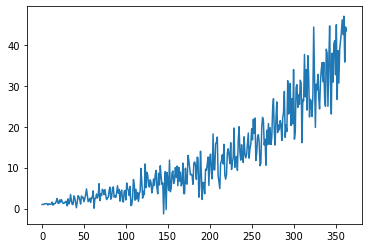

In [74]:
plt.plot(x, y)

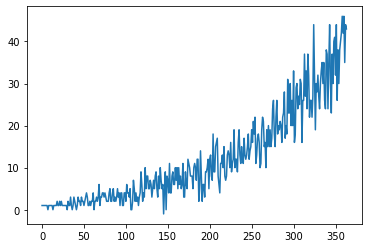

In [75]:
plt.plot(x, y.astype(int))

In [77]:
# Mo..So
days_offset = np.array([[0.7, 0.9, 0.65, 0.4, 0.25, 0.4, 0.6]])

In [83]:
year_offset = days_offset.repeat(52, 0).flatten()
y_sample = (y / 3) * year_offset + 2 * y / 3

In [112]:
def add_week_offsets(y):
    year_offset = days_offset.repeat(N / 7, 0).flatten()
    return (y / 3) * year_offset + 2 * y / 3

In [113]:
def generate_samples(x):
    return add_week_offsets(with_white_noise(x))

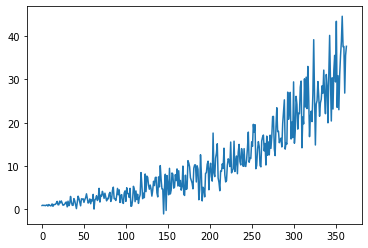

In [84]:
plt.plot(x, y_sample)

In [85]:
import csv

In [101]:
data = np.dstack((x.astype(int), y_sample.astype(int)))

In [104]:
data = data.squeeze()

In [108]:
np.savetxt("year_sample_data.csv", data, delimiter=",", header="days_offset,sales", fmt="%i")

In [124]:
def combine_save(x, y, n=0):
    data = np.dstack((x.astype(int), y.astype(int))).squeeze()
    np.savetxt(f"year_sample_data_{n}.csv", data, delimiter=",", header="days_offset,sales", fmt="%i")

In [125]:
for i in range(20):
    y = generate_samples(x)
    combine_save(x, y, i)